In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Merging 12 months sales data into a single file 

In [2]:
df=pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]

all_data=pd.DataFrame()

for file in files:
    df=pd.read_csv("./Sales_Data/"+file)
    all_data= pd.concat([all_data,df])

all_data.to_csv('all_data.csv', index=False)

In [6]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Data Cleaning 

In [7]:
all_data.dropna(how='any', inplace= True)
all_data['month']= all_data['Order Date'].str[0:2]
all_data=all_data[all_data['month'].str[0:2]!='Or']
all_data['month']= all_data['month'].astype(int)
all_data['Quantity Ordered']= all_data['Quantity Ordered'].astype(int)
all_data['Price Each']= all_data['Price Each'].astype(float)


### Q1: What is the best month for sales? How much was earned that month ?

In [5]:
all_data['sales']= all_data['Quantity Ordered']* all_data['Price Each']
all_data.head()
max_sales=all_data.groupby('month')['sales'].sum().reset_index()
print(max_sales)

    month       sales
0       1  1822256.73
1       2  2202022.42
2       3  2807100.38
3       4  3390670.24
4       5  3152606.75
5       6  2577802.26
6       7  2647775.76
7       8  2244467.88
8       9  2097560.13
9      10  3736726.88
10     11  3199603.20
11     12  4613443.34


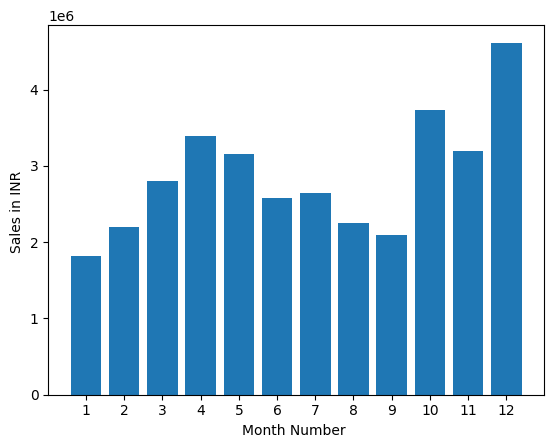

In [8]:
months= range(1,13)
plt.bar(months,max_sales['sales'] )
plt.xticks(months)
plt.ylabel('Sales in INR ')
plt.xlabel('Month Number ')
plt.show()

### Which city has the maximum sales ?

In [9]:
all_data['City']= all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
city_wise= all_data.groupby('City')['sales'].sum().reset_index()
city_wise= city_wise.sort_values ('sales', ascending=False)
city_wise.head()

,City,sales
7,San Francisco,8262203.91
4,Los Angeles,5452570.80
5,New York City,4664317.43
2,Boston,3661642.01
0,Atlanta,2795498.58


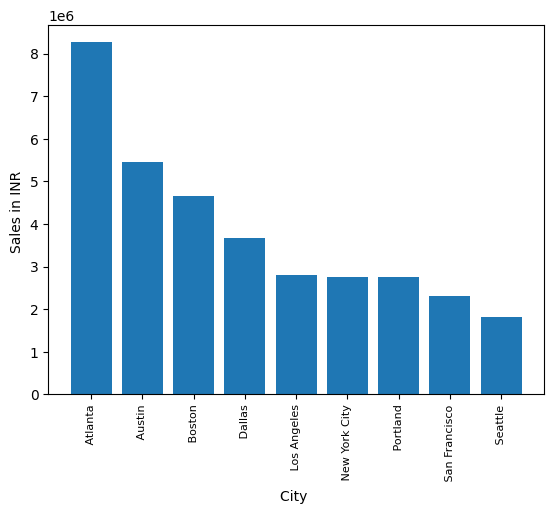

In [10]:
Cities= [city for city , df in all_data.groupby('City')]
plt.bar(Cities,city_wise['sales'] )
plt.xticks(Cities, rotation= 'vertical', size= 8)
        
plt.ylabel('Sales in INR ')
plt.xlabel('City ')
plt.show()

### What time should we display the advertisemnets to maximize likelihoods of customer's buying products? 

In [ ]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])
all_data['Hours']= all_data['Order Date'].dt.hour
all_data['Minute']= all_data['Order Date'].dt.minute

hours=[hour for hour, df in all_data.groupby('Hours')]
plt.plot(hours, all_data.groupby('Hours').count())
plt.xticks(hours)
plt.grid()
plt.show()

### What products are most often sold together ?

In [26]:
df= all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.drop_duplicates(subset='Order ID', inplace=True)
df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_3184\2713339817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
C:\Users\admin\AppData\Local\Temp\ipykernel_3184\2713339817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset='Order ID', inplace=True)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,City,Hours,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,17,0,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City,11,7,"Lightning Charging Cable,USB-C Charging Cable"


In [19]:
df['Grouped'].value_counts()

Grouped
iPhone,Lightning Charging Cable                                          882
Google Phone,USB-C Charging Cable                                        856
iPhone,Wired Headphones                                                  361
Vareebadd Phone,USB-C Charging Cable                                     312
Google Phone,Wired Headphones                                            303
                                                                        ... 
iPhone,Lightning Charging Cable,Wired Headphones,USB-C Charging Cable      1
Vareebadd Phone,27in FHD Monitor                                           1
LG Dryer,Lightning Charging Cable                                          1
ThinkPad Laptop,LG Dryer                                                   1
LG Washing Machine,AA Batteries (4-pack)                                   1
Name: count, Length: 366, dtype: int64

### What product sold the most? Why do you think it sold the most ?

In [40]:
df1= all_data.groupby('Product')['Quantity Ordered'].sum().reset_index(name='Total Quantity')
df1.sort_values(by='Total Quantity', ascending=False, inplace=True)
df1.head()

,Product,Total Quantity
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
